In [42]:
import re

# 正則拆分網址
def RegexMatchingTest(regex, input_text):
    pattern = re.compile(regex)
    result = re.search(pattern, input_text)

    if result:
        if result.lastindex is not None:
            for i in range(0, result.lastindex+1):
                return result.group(2)
    else:
        return None


regex = "(\w+):\/\/([^/:]+)?([^# !>]*)"


In [43]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd

browser = webdriver.Chrome(
    executable_path='E:\Project\\1st-PyCrawlerMarathon\chromedriver\chromedriver.exe')
# 目標文章數量
target_count = 500

article_count = 1
article_url = []
article_content = {}
keepGoing = True
url = "https://www.cupoy.com/newsfeed/topicgrp/life_tw"

browser.get(url)
time.sleep(5)

while keepGoing:
    html = browser.page_source
    soup = BeautifulSoup(html, "lxml")

    news_block = soup.find_all('div', class_='sc-eEieub sc-iuDHTM ibJqYc')

    for news_item in news_block:
        url = news_item.find(
            'a', class_='sc-RbTVP sc-kEmuub eSJXii').get("href")
        article_content.setdefault(article_count, {})
        # 目標文章數量-1篇之前處理
        if url not in article_url and article_count < target_count:
            article_url.append(url)
            article_content[article_count]['title'] = news_item.find('h6').string
            article_content[article_count]['category'] = news_item.find(
                'div', class_='sc-gacfCG bPSpUf').string
            article_content[article_count]['Summary'] = news_item.find(
                'p', class_='sc-FQuPU sc-ciodno bvnzOw').string
            article_content[article_count]['link'] = url               
            article_content[article_count]['domain'] = RegexMatchingTest(regex, url)   
            article_count += 1
        # 目標文章數量最後一篇處理
        elif url not in article_url and article_count == target_count:
            article_content[article_count]['title'] = news_item.find('h6').string
            article_content[article_count]['category'] = news_item.find(
                'div', class_='sc-gacfCG bPSpUf').string
            article_content[article_count]['Summary'] = news_item.find(
                'p', class_='sc-FQuPU sc-ciodno bvnzOw').string
            article_content[article_count]['link'] = url
            article_content[article_count]['domain'] = RegexMatchingTest(regex, url)
            keepGoing = False

    time.sleep(2)
    browser.execute_script("window.scrollBy(0,10000)")

# print(article_content)
browser.quit()
frame = pd.DataFrame(article_content)
frame.T


,title,category,Summary,link,domain
1,疫情衝擊不只F1上海站 北京車展可能推遲或取消 | 車壇新訊 | 國際車訊 | 發燒車訊,汽車,新冠肺炎（COVID-19）持續衝擊大型活動的舉辦，繼日前西班牙巴塞隆納MWC世界通訊大會取...,https://autos.udn.com/autos/story/7826/4348130,autos.udn.com
2,特斯拉召回至少 1.8 萬臺 Model X，轉向器有失去動力的安全疑慮 | MoneyDJ...,汽車,召回的方案適用於 2016 年生產的 Model X，在 2016 年 10 月中旬之後製造...,https://blog.moneydj.com/news/2020/02/15/%e7%8...,blog.moneydj.com
3,處理生氣情緒５大類 你屬於哪一型？ - uho優活健康網,醫療健康,（優活健康網編輯部╱綜合整理）當了媽媽之後，每天催眠自己：「不可以生氣」、「生氣就是壞媽媽」...,http://www.uho.com.tw/hotnews.asp?aid=50919,www.uho.com.tw
4,窮人的高速公路不只省錢 濕地、夕陽、燈塔、美食一次體驗 | 信傳媒,美食,交通部公路總局與天下雜誌合作出版《吹海風的路:臺61線西部濱海快速公路》一書，1,https://www.cmmedia.com.tw/home/articles/19923,www.cmmedia.com.tw
5,手腳「發麻刺痛」非小事！當心糖尿病、甲狀腺低下「5種病」已潛,醫療健康,手腳「發麻刺痛」非小事！當心糖尿病、甲狀腺低下「5種病」已潛藏體內，再忽略就晚了｜每日健康H...,https://healthylives.tw/Article/582V9bugxvU.html,healthylives.tw
...,...,...,...,...,...
496,寶寶半夜哭鬧不停！各年齡快速哄睡3法．讓爸媽上班有精神｜Mombaby 媽媽寶寶懷孕生活網,育兒,訓練寶寶有規律睡眠，可在3個月大後，增加他白天的清醒時間，並在清醒時就把他放到嬰兒牀上，且在...,https://www.mombaby.com.tw/parenting/babycare/...,www.mombaby.com.tw
497,孩子，我終於等到你「破產」了！│親子天下嚴選,育兒,【熬了兩年，終於等到兒子破。產。了！】我想要讓他們享受新年拿紅包的快樂，順便學習財務管理，因...,https://best.parenting.com.tw/blogger_article....,best.parenting.com.tw
498,教養風格測測看：老虎、恐龍、貓、蛇，妳是屬於哪一種？｜Mombaby 媽媽寶寶懷孕生活網,育兒,根據發展心理學家Diana Baumrind的「家庭教養模式（parenting style...,https://www.mombaby.com.tw/parenting/education...,www.mombaby.com.tw
499,自然產＆剖腹產．順利「卸貨」後還要注意哪些事？｜Mombaby 媽媽寶寶懷孕生活網,育兒,經歷生產大關，無論是經歷自然產或是剖腹產的媽咪，身體多少伴隨著傷口的疼痛，母奶何時會分泌、第...,https://www.mombaby.com.tw/pregnacy/care/artic...,www.mombaby.com.tw


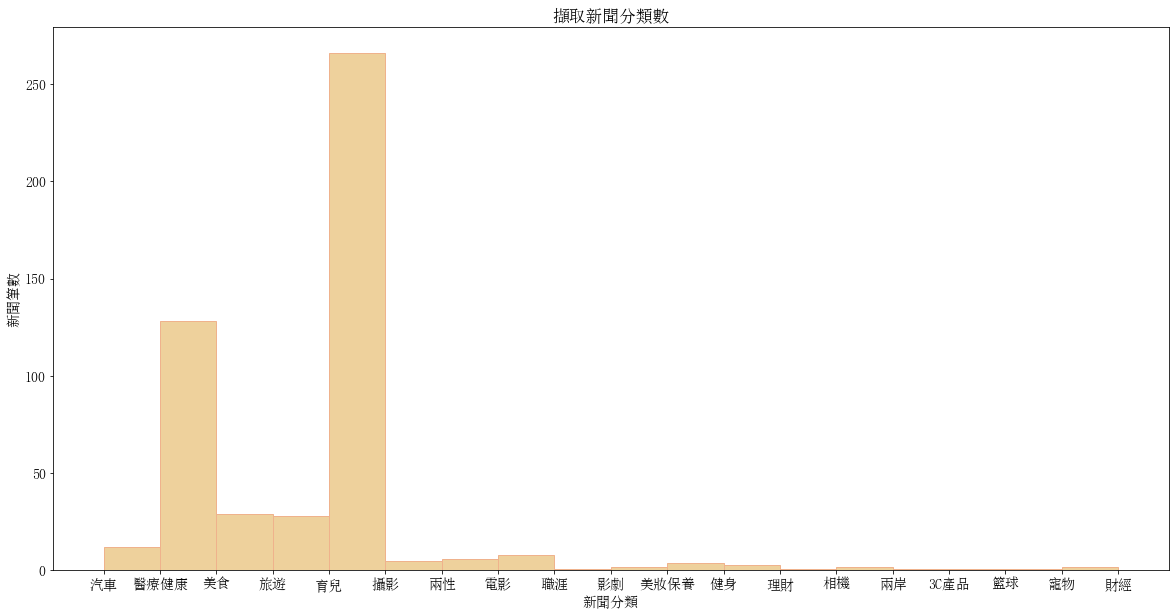

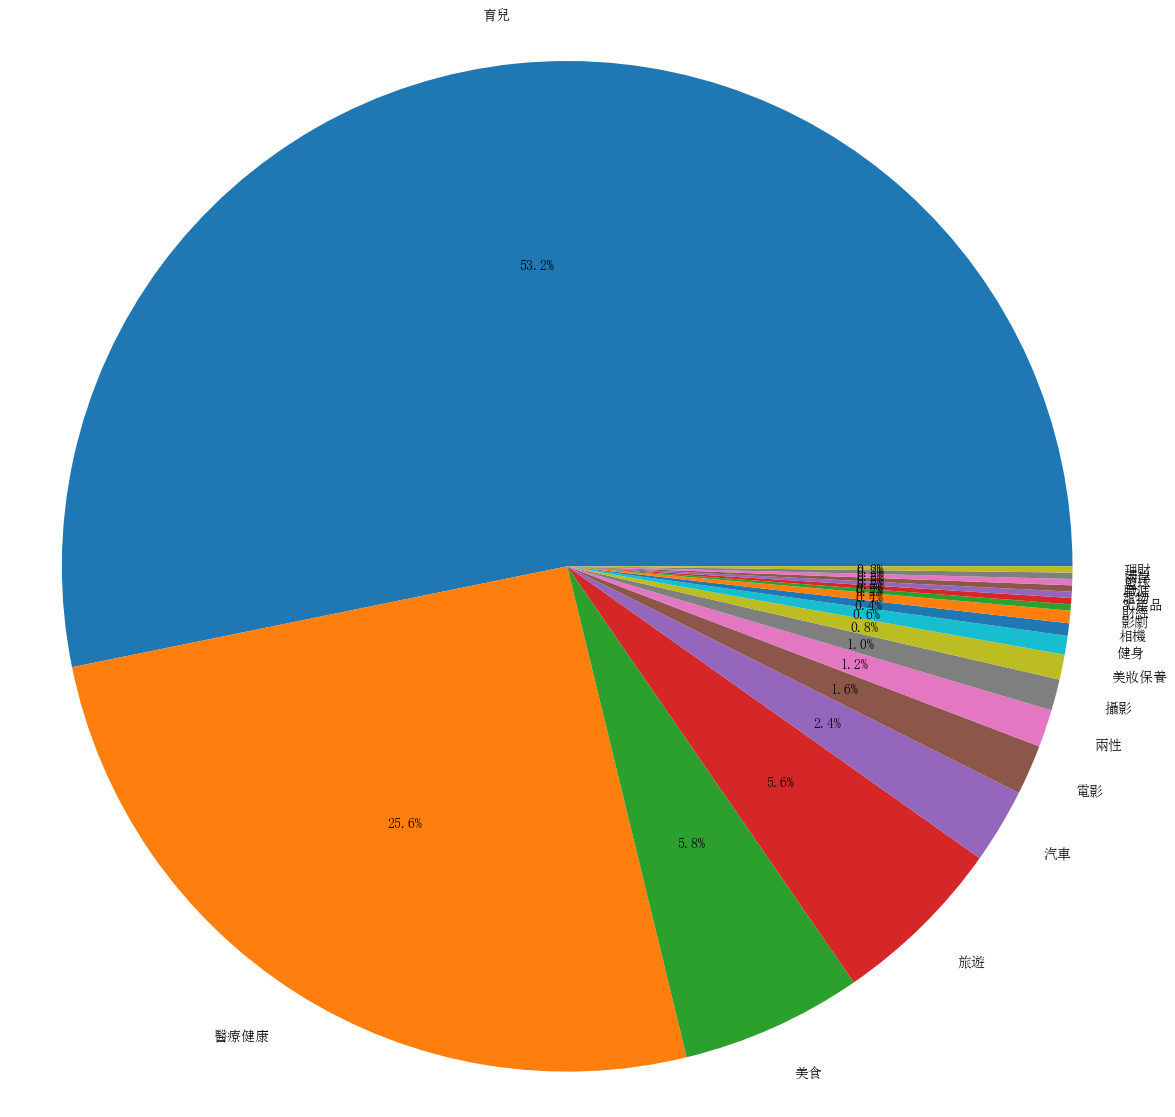

In [115]:
import matplotlib.pyplot as plt

frame = frame.T

plt.rcParams['font.sans-serif'] = ['SimSun']  
plt.rcParams['axes.unicode_minus'] = False   
plt.rcParams['font.size'] = 14

plt.figure(figsize=(20,10))
plt.xlabel('新聞分類')
plt.ylabel('新聞筆數')
plt.title('擷取新聞分類數')
plt.hist(frame['category'],bins=18,edgecolor='#EFB28C',color='#EED19C',linewidth=1)
plt.show()

# 計算次數後轉換Dataframe
df =frame.category.value_counts().rename_axis('category').reset_index(name='counts')

plt.figure(figsize=(20,20))    

labels = df["category"]      
size = df["counts"]                     
plt.pie(size , labels = labels,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

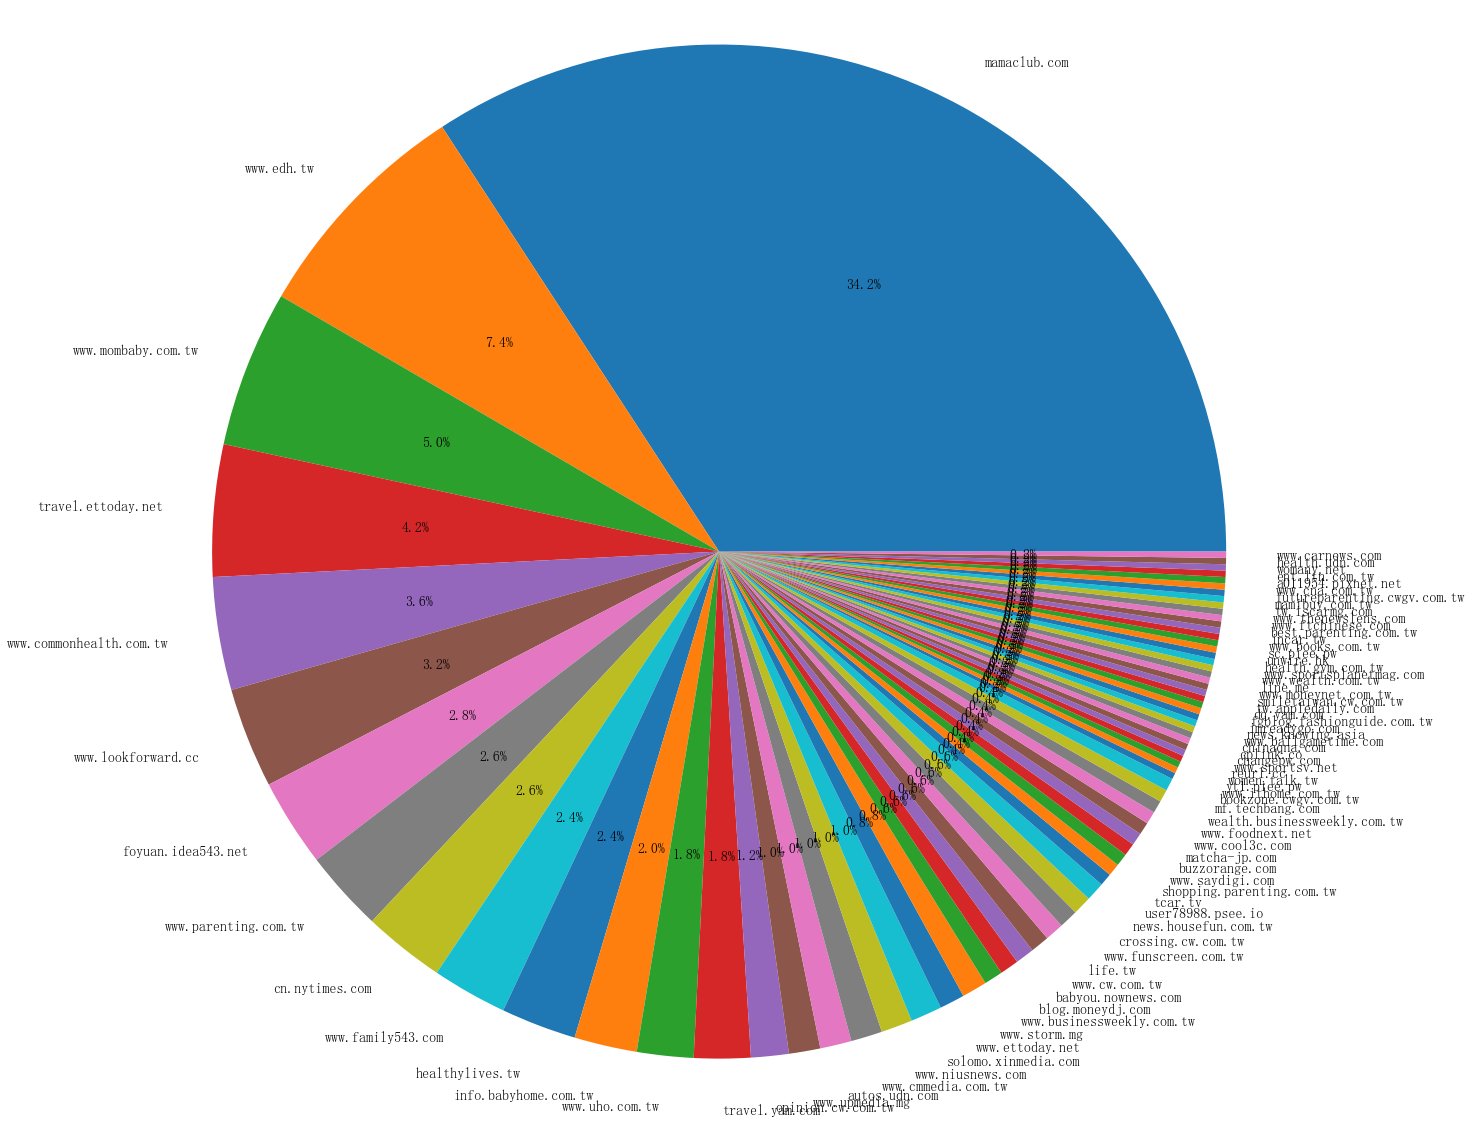

In [116]:
# 計算次數後轉換Dataframe
df =frame.domain.value_counts().rename_axis('domain').reset_index(name='counts')

plt.figure(figsize=(20,20))    

labels = df["domain"]      
size = df["counts"]                     
plt.pie(size , labels = labels,autopct='%1.1f%%')
plt.axis('equal')
plt.show()